In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

 1)Replace the NaN values with correct value. And justify why you have chosen the same.

 If updated Mean/Median/mode value data will be changed. Updating 0 value in Missing value, so the details will be same.

In [4]:
dataset.fillna({"salary":0},inplace=True)
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

2)How many of them are not placed?

67 students are not placed.

In [5]:
dataset["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

3)Find the reason for non placement from the dataset?

In [6]:
NP= dataset[dataset["status"]=="Not Placed"]

#sep= NP[["specialisation"]["ssc_b"]["gender"]["degree_t"]["status"]]
print(NP["ssc_b"].value_counts())
print(NP["gender"].value_counts())
print(NP["degree_t"].value_counts())
print(NP["status"].value_counts())
print(NP["mba_p"].mean())

#print (NP["specialisation"]["ssc_b"]["gender"]["degree_t"]["status"].value_counts())

ssc_b
Central    38
Others     29
Name: count, dtype: int64
gender
M    39
F    28
Name: count, dtype: int64
degree_t
Comm&Mgmt    43
Sci&Tech     18
Others        6
Name: count, dtype: int64
status
Not Placed    67
Name: count, dtype: int64
61.612835820895526


4)What kind of relation between salary and mba_p

Positive Corelation - Independent variable is directly proportional to dependent variable

In [7]:
corr= dataset["salary"].corr(dataset["mba_p"])
corr

0.13982273892615557

5)Which specialization is getting minimum salary?

Minimum Salary is 2,00,000 and 2 specialisation:Mkt&Fin, Mkt&HR

In [8]:
val_salary=dataset[dataset["salary"]>0]
Min_salary=val_salary["salary"].min()
Min_specialisation= val_salary[val_salary["salary"] == Min_salary]

#min_specializations = df_valid[df_valid["salary"] == min_salary]
print ("Minimum Salary:", Min_salary, Min_specialisation)

Minimum Salary: 200000.0      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
1        2      M  79.33  Central  78.33   Others   Science     77.48   
15      16      F  65.00  Central  75.00  Central  Commerce     69.00   
44      45      F  77.00   Others  73.00   Others  Commerce     81.00   
50      51      F  75.20  Central  73.20  Central   Science     68.40   
107    108      M  82.00   Others  90.00   Others  Commerce     83.00   
135    136      F  72.00  Central  56.00   Others   Science     69.00   

      degree_t workex  etest_p specialisation  mba_p  status    salary  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28  Placed  200000.0  
15   Comm&Mgmt    Yes     72.0        Mkt&Fin  64.66  Placed  200000.0  
44   Comm&Mgmt    Yes     89.0        Mkt&Fin  69.70  Placed  200000.0  
50   Comm&Mgmt     No     65.0         Mkt&HR  62.98  Placed  200000.0  
107  Comm&Mgmt     No     80.0         Mkt&HR  73.52  Placed  200000.0  
135  Comm&Mgmt     No    

6)How many of them getting above 500000 salary?

6 members are getting above 500000 salary

In [9]:
sal= dataset[dataset["salary"]>=500000]
print ("Salary above 5,00,000:", sal.value_counts().sum())
print(sal)

Salary above 5,00,000: 6
     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
77      78      M  64.00   Others  80.00   Others   Science     65.00   
119    120      M  60.80  Central  68.40  Central  Commerce     64.60   
150    151      M  71.00  Central  58.66  Central   Science     58.00   
163    164      M  63.00   Others  67.00   Others   Science     64.00   
174    175      M  73.24   Others  50.83   Others   Science     64.27   
177    178      F  73.00  Central  97.00   Others  Commerce     79.00   

      degree_t workex  etest_p specialisation  mba_p  status    salary  
77    Sci&Tech    Yes    69.00        Mkt&Fin  57.65  Placed  500000.0  
119  Comm&Mgmt    Yes    82.66        Mkt&Fin  64.34  Placed  940000.0  
150   Sci&Tech    Yes    56.00        Mkt&Fin  61.30  Placed  690000.0  
163   Sci&Tech     No    75.00        Mkt&Fin  66.46  Placed  500000.0  
174   Sci&Tech    Yes    64.00        Mkt&Fin  66.23  Placed  500000.0  
177  Comm&Mgmt    Yes    

7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

pvalue is greater than 0.05, so this Null Hypothesis

In [10]:
import scipy.stats as stats
stats.f_oneway(dataset["etest_p"], dataset["mba_p"])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make
 decision using Hypothesis Testing)

 pvalue is less than 0.05, so there is similarity

In [11]:
from scipy.stats import ttest_ind
degree_t= dataset[dataset["degree_t"]=="Sci&Tech"]["salary"]
specialisation= dataset[dataset["specialisation"]=="Mkt&HR"]["salary"]
ttest_ind(degree_t,specialisation)


TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

9)Convert the normal distribution to standard normal distribution for salary column

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

zscore(dataset["salary"])

0      0.461711
1      0.008404
2      0.332195
3     -1.286761
4      1.465463
         ...   
210    1.303568
211    0.494090
212    0.623607
213    0.034307
214   -1.286761
Name: salary, Length: 215, dtype: float64

10)What is the probability Density Function of the salary range from 700000 to 900000?

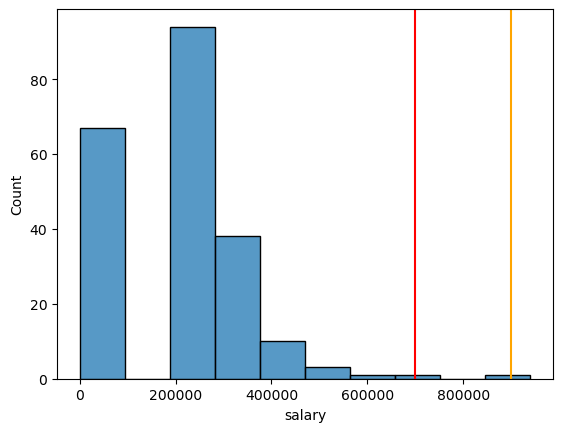

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
def pdf(dataset,startrange, endrange):
    ax=sns.histplot(dataset)
    plt.axvline(startrange, color='Red')
    plt.axvline(endrange, color='Orange')

pdf(dataset["salary"],700000, 900000)

11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.
(Make decision using Hypothesis Testing)

pvalue is greater than 0.05 so they are not similiar

In [14]:
from scipy.stats import ttest_rel
etest_p= dataset[dataset["degree_t"]=="Sci&Tech"]["etest_p"]
mba_p= dataset[dataset["degree_t"]=="Sci&Tech"]["mba_p"]
ttest_rel(etest_p,mba_p)


TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

12)Which parameter is highly correlated with salary?

ssc_p is highly correlated with salary

In [15]:
from Univariate import Univariate
qual, quan = Univariate.quanQual(dataset)
quan

#data= dataset[dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'],dataset['etest_p'],dataset['mba_p']]
ssc= dataset["ssc_p"].corr(dataset["salary"])
hsc= dataset["hsc_p"].corr(dataset["salary"])
degree= dataset["degree_p"].corr(dataset["salary"])
etest= dataset["etest_p"].corr(dataset["salary"])
mba= dataset["mba_p"].corr(dataset["salary"])

print ("ssc:", ssc , "hsc:", hsc , "degree:", degree, "etest:", etest, "mba:", mba)

ssc: 0.5380897133485512 hsc: 0.4525687760619277 degree: 0.4083707811765698 etest: 0.18698768538632038 mba: 0.13982273892615557


13)plot any useful graph and explain it

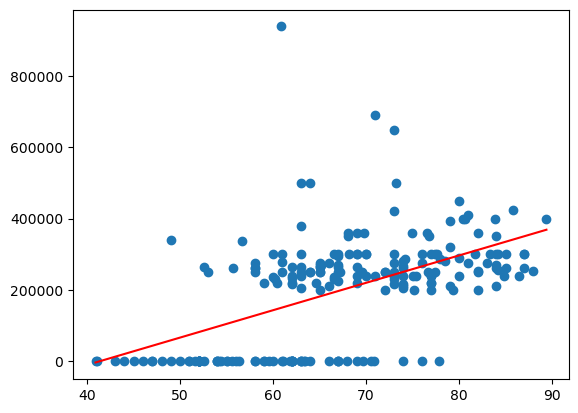

In [16]:
plt.scatter(dataset["ssc_p"], dataset["salary"])
plt.plot(np.unique(dataset["ssc_p"]), np.poly1d(np.polyfit(dataset["ssc_p"], dataset["salary"], 1))
         (np.unique(dataset["ssc_p"])), color='red')